In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.embed import file_html
from bokeh.resources import CDN

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving alzheimers_prediction_dataset.csv to alzheimers_prediction_dataset.csv


In [1]:
import pandas as pd

df = pd.read_csv("alzheimers_prediction_dataset.csv")

# Preview the dataset
df.head()


,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


# Motivation

This project investigates global patterns in Alzheimer’s disease diagnosis using a multifaceted dataset that includes demographic, lifestyle, environmental, and genetic variables. The dataset was selected not only for its scale and diversity, but also because it emphasizes social and behavioral aspects—such as physical activity, stress, education, and community engagement—rather than focusing exclusively on clinical indicators.

By exploring how these social determinants relate to diagnosis rates, the project aims to gain deeper insights into the patterns and disparities associated with Alzheimer’s disease across different populations. Rather than focusing on clinical treatment or prevention, the analysis emphasizes understanding how broader lifestyle, environmental, and country-level differences may be associated with diagnosis outcomes. This includes identifying how factors such as age, family history, genetic risk, and national contexts relate to the likelihood of receiving an Alzheimer’s diagnosis.




## Basic Stats

Before diving into analysis, we took steps to clean and prepare the dataset. The Alzheimer’s Prediction Dataset (Global) included over 74,000 records and 25 columns spanning demographics, lifestyle, medical history, environmental exposure, and more.

To ensure consistency, we converted all column names and categories to a standardized format. For example, missing values in categorical variables like *Family History of Alzheimer’s* and *Genetic Risk Factor (APOE-ε4 allele)* were filled with `"Unknown"` to preserve records during group comparisons. The *Diagnosis* column was also recoded into `"Alzheimer"` and `"No AD"` for better readability.

We then explored key characteristics of the data using summary statistics and visualizations. Some initial observations included:

- The age distribution is heavily skewed toward older adults, with Alzheimer’s diagnoses increasing with age.
- A higher proportion of diagnosed individuals reported having a family history of the disease and the presence of the APOE-ε4 genetic marker.
- Socioeconomic and lifestyle variables like income, education, and physical activity also showed noticeable patterns between diagnosed and non-diagnosed groups.

These basic insights helped guide further analysis, such as feature selection and country-level aggregation, and ensured that relevant patterns were retained during preprocessing.



In [ ]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [ ]:
# Display columns
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [ ]:
# Display dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Li

In [ ]:
# Basic counts
df['Alzheimer’s Diagnosis'].value_counts(normalize=True) * 100

,proportion
Alzheimer’s Diagnosis,
No,58.654066
Yes,41.345934


In [ ]:
# Median and mode summaries
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,74283,20,Brazil,3839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,74283.0,NaN,NaN,NaN,71.964703,12.980748,50.0,61.0,72.0,83.0,94.0
Gender,74283,2,Female,37249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,74283.0,NaN,NaN,NaN,9.487514,5.75702,0.0,4.0,9.0,14.0,19.0
BMI,74283.0,NaN,NaN,NaN,26.780639,4.764679,18.5,22.7,26.8,30.9,35.0
Physical Activity Level,74283,3,High,24853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking Status,74283,3,Current,24915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol Consumption,74283,3,Never,24865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diabetes,74283,2,No,59527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hypertension,74283,2,No,52134,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("alzheimers_prediction_dataset.csv")

# Clean Diagnosis for easier handling
df['Diagnosis'] = df['Alzheimer’s Diagnosis'].map({'No': 'No AD', 'Yes': 'Alzheimer'})

# Separate into two groups
alz_df = df[df['Diagnosis'] == 'Alzheimer']
noad_df = df[df['Diagnosis'] == 'No AD']

# Function to summarize profile
def summarize_profile(group_df, group_name):
    print(f"--- {group_name} ---")
    print(f"Typical Age: {group_df['Age'].median()} years old")
    print(f"Typical Gender: {group_df['Gender'].mode()[0]}")
    print(f"Typical BMI: {group_df['BMI'].median():.1f}")
    print(f"Typical Education Level: {group_df['Education Level'].median()}")
    print(f"Typical Physical Activity Level: {group_df['Physical Activity Level'].mode()[0]}")
    print(f"Typical Smoking Status: {group_df['Smoking Status'].mode()[0]}")
    print(f"Typical Alcohol Consumption: {group_df['Alcohol Consumption'].mode()[0]}")
    print(f"Typical Diabetes Status: {group_df['Diabetes'].mode()[0]}")
    print(f"Typical Hypertension Status: {group_df['Hypertension'].mode()[0]}")
    print(f"Typical Cholesterol Level: {group_df['Cholesterol Level'].mode()[0]}")
    print(f"Family History of Alzheimer’s: {group_df['Family History of Alzheimer’s'].mode()[0]}")
    print(f"Typical Cognitive Test Score: {group_df['Cognitive Test Score'].median()}")
    print(f"Typical Depression Level: {group_df['Depression Level'].mode()[0]}")
    print(f"Typical Sleep Quality: {group_df['Sleep Quality'].mode()[0]}")
    print(f"Typical Dietary Habits: {group_df['Dietary Habits'].mode()[0]}")
    print(f"Typical Air Pollution Exposure: {group_df['Air Pollution Exposure'].mode()[0]}")
    print(f"Typical Employment Status: {group_df['Employment Status'].mode()[0]}")
    print(f"Typical Marital Status: {group_df['Marital Status'].mode()[0]}")
    print(f"Genetic Risk (APOE-ε4 allele): {group_df['Genetic Risk Factor (APOE-ε4 allele)'].mode()[0]}")
    print(f"Typical Social Engagement Level: {group_df['Social Engagement Level'].mode()[0]}")
    print(f"Typical Income Level: {group_df['Income Level'].mode()[0]}")
    print(f"Typical Stress Level: {group_df['Stress Levels'].mode()[0]}")
    print(f"Typical Urban vs Rural Living: {group_df['Urban vs Rural Living'].mode()[0]}")
    print("\n")

# Show profiles
summarize_profile(alz_df, "Typical Alzheimer's Patient Profile")
summarize_profile(noad_df, "Typical No AD Patient Profile")


--- Typical Alzheimer's Patient Profile ---
Typical Age: 80.0 years old
Typical Gender: Female
Typical BMI: 26.8
Typical Education Level: 10.0
Typical Physical Activity Level: High
Typical Smoking Status: Never
Typical Alcohol Consumption: Occasionally
Typical Diabetes Status: No
Typical Hypertension Status: No
Typical Cholesterol Level: Normal
Family History of Alzheimer’s: No
Typical Cognitive Test Score: 65.0
Typical Depression Level: Low
Typical Sleep Quality: Good
Typical Dietary Habits: Average
Typical Air Pollution Exposure: Low
Typical Employment Status: Retired
Typical Marital Status: Single
Genetic Risk (APOE-ε4 allele): No
Typical Social Engagement Level: Medium
Typical Income Level: Medium
Typical Stress Level: High
Typical Urban vs Rural Living: Rural


--- Typical No AD Patient Profile ---
Typical Age: 65.0 years old
Typical Gender: Female
Typical BMI: 26.8
Typical Education Level: 9.0
Typical Physical Activity Level: Low
Typical Smoking Status: Current
Typical Alcohol Co

<ipython-input-4-4c06b21e3272>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-4-4c06b21e3272>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-4-4c06b21e3272>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-4-4c06b21e3272>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-4-4c06b21e3272>:33: UserWarning: set_ticklabels() should only

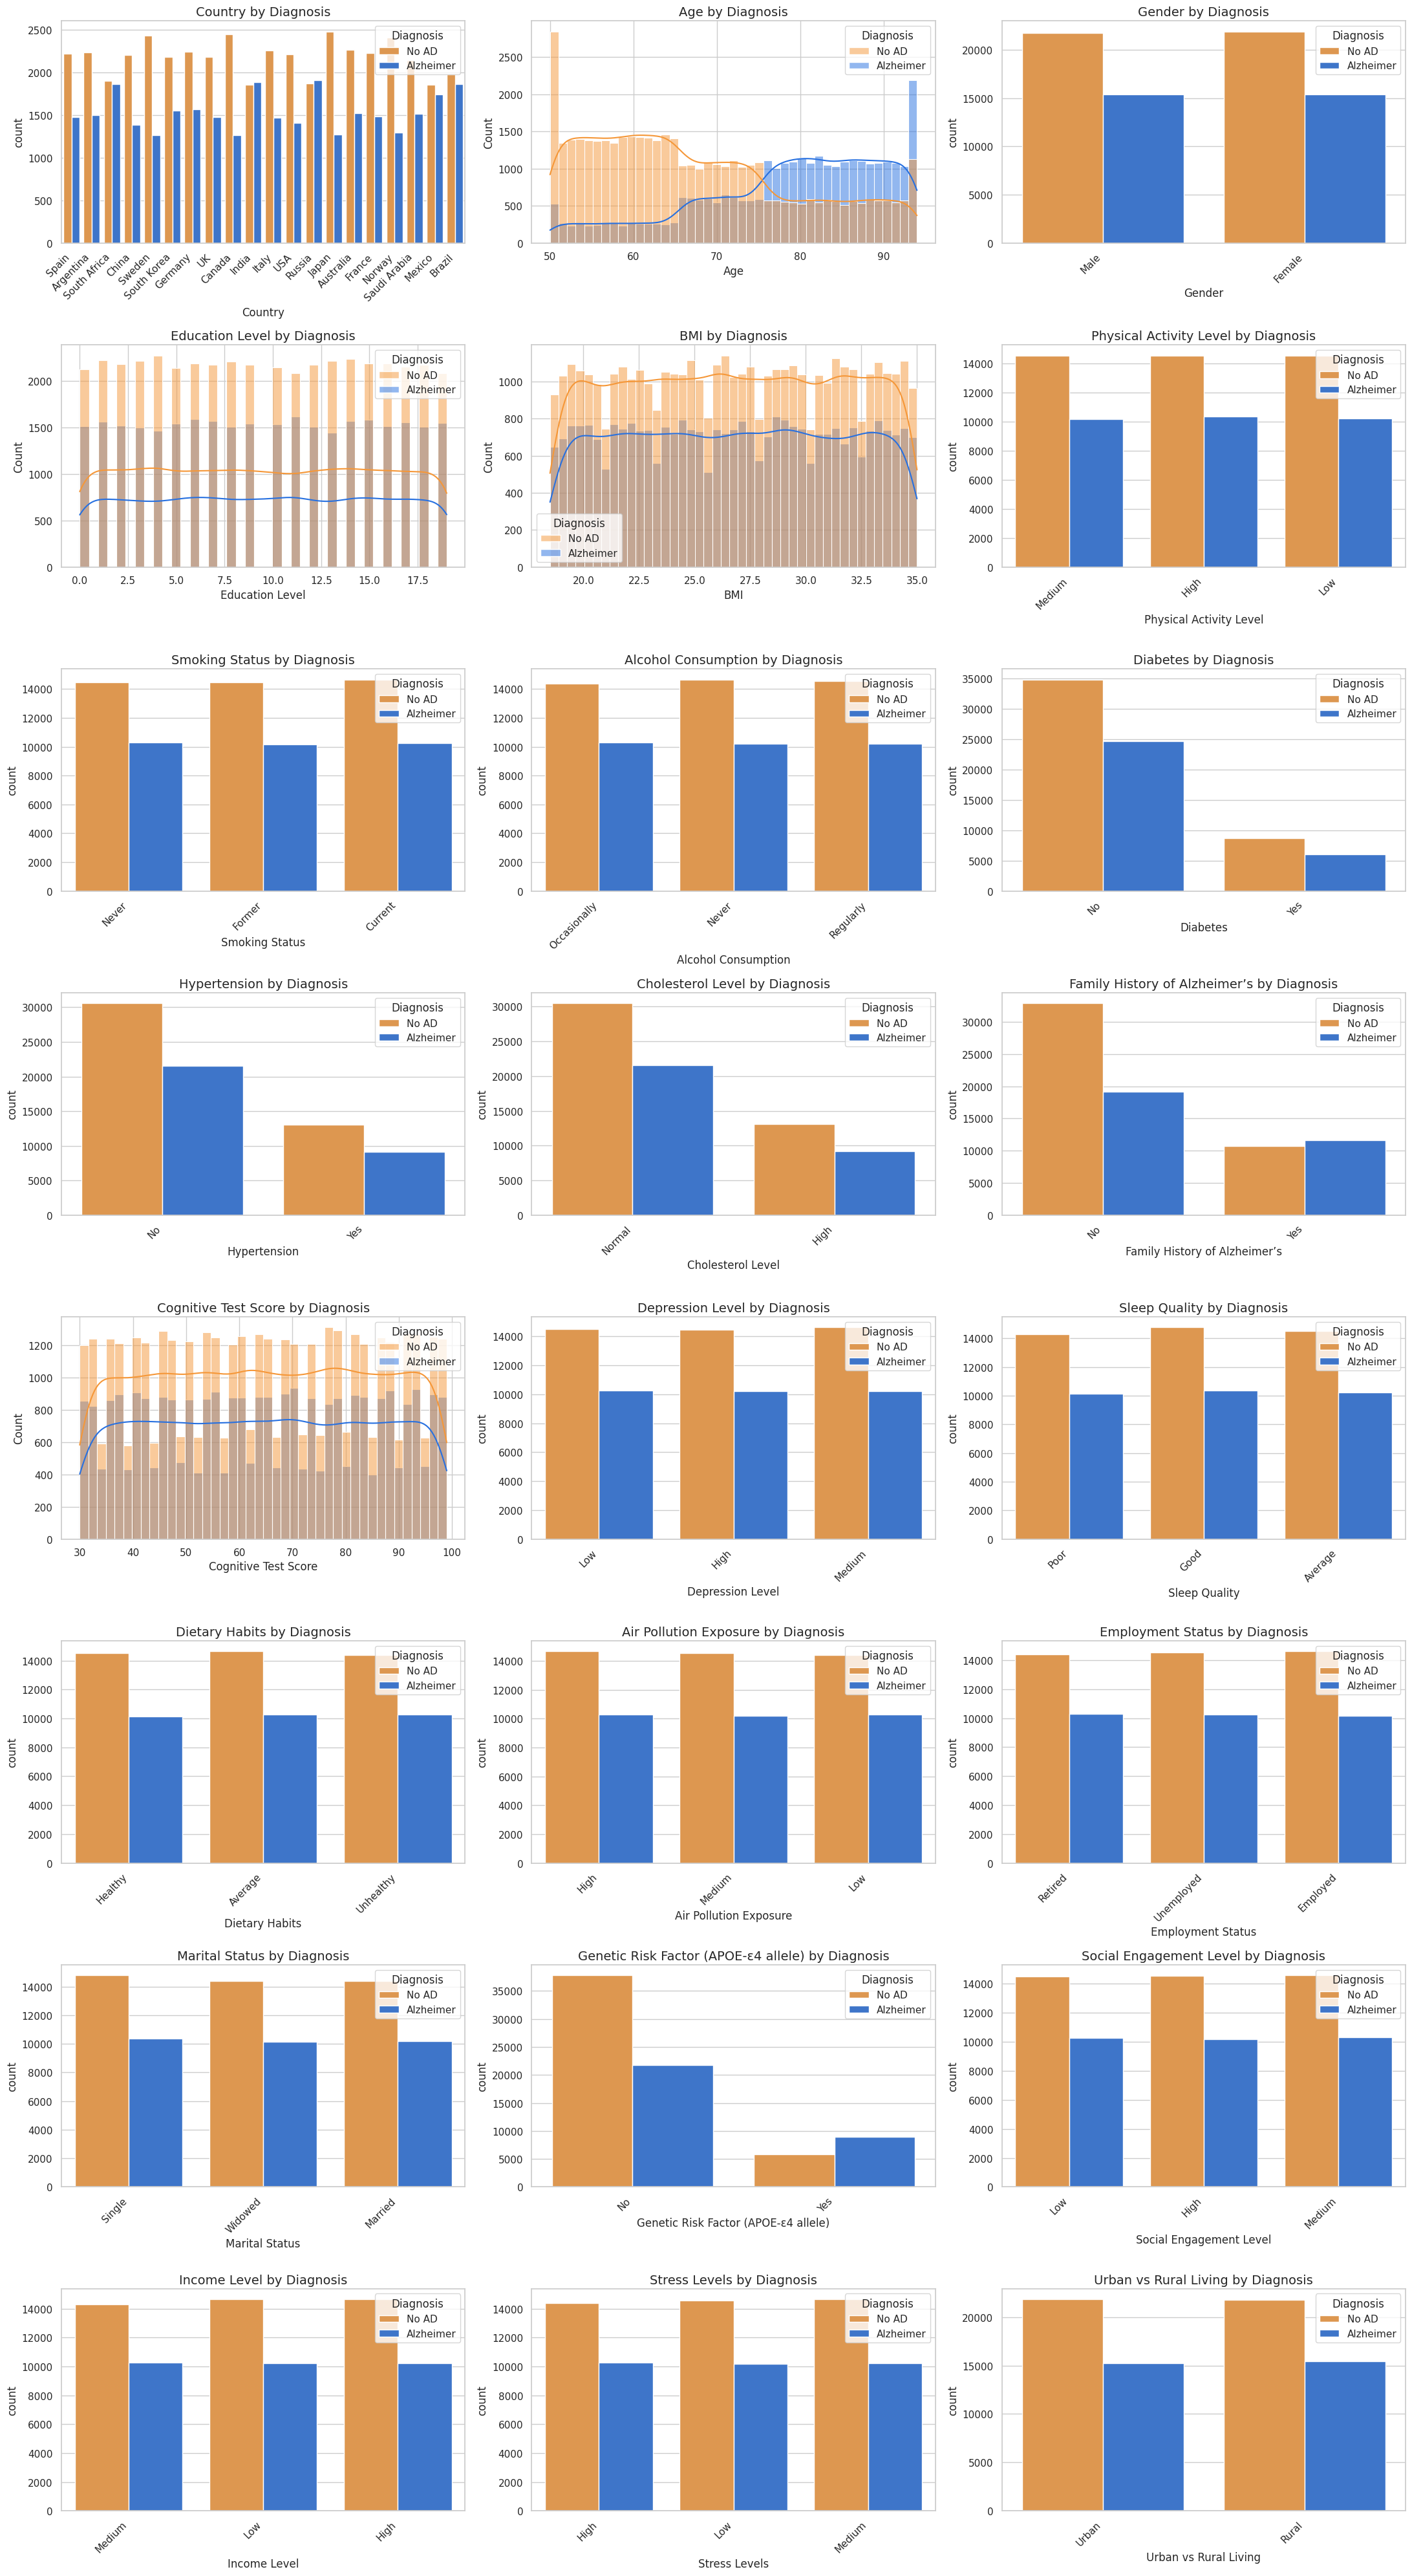

In [4]:
# Clean Diagnosis for easier handling
df['Diagnosis'] = df['Alzheimer’s Diagnosis'].map({'No': 'No AD', 'Yes': 'Alzheimer'})

# Full list of variables (excluding 'Diagnosis' which is already mapped)
variables = [
    'Country', 'Age', 'Gender', 'Education Level', 'BMI',
    'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
    'Diabetes', 'Hypertension', 'Cholesterol Level',
    'Family History of Alzheimer’s', 'Cognitive Test Score',
    'Depression Level', 'Sleep Quality', 'Dietary Habits',
    'Air Pollution Exposure', 'Employment Status', 'Marital Status',
    'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
    'Income Level', 'Stress Levels', 'Urban vs Rural Living'
]

# Custom color palette
custom_palette = {'Alzheimer': '#2770E0', 'No AD': '#F59738'}

# Set style
sns.set(style="whitegrid")

# Plot layout
n_cols = 3
n_rows = (len(variables) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 5 * n_rows))
axes = axes.flatten()

# Plot each selected variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    if df[var].dtype == 'object':
        sns.countplot(data=df, x=var, hue="Diagnosis", ax=ax, palette=custom_palette)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    else:
        sns.histplot(data=df, x=var, hue="Diagnosis", kde=True, ax=ax, palette=custom_palette)
    ax.set_title(f"{var} by Diagnosis", fontsize=14)

# Remove empty plots if any
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Using summary statistics, the profiles of individuals diagnosed with Alzheimer’s and those without were compared to identify patterns and contrasts. These statistics provided the foundation for defining a “typical” Alzheimer's patient in our visual storytelling.

Key Findings:
- Age was the most significant differentiator, with Alzheimer’s patients
typically being older (median 80) compared to non-diagnosed individuals (median 65).

- Gender distribution showed a higher prevalence among females for both groups.

- Differences in physical activity, alcohol and smoking habits, and stress levels were also apparent.

- Interestingly, genetic risk and family history did not distinguish the groups strongly in this dataset.

- Living environment (urban vs rural) and employment status provided insight into contextual social factors potentially influencing diagnosis likelihood.

These patterns helped frame the design of interactive tools and the map filters used later in the analysis.

### Correlation Heat Map

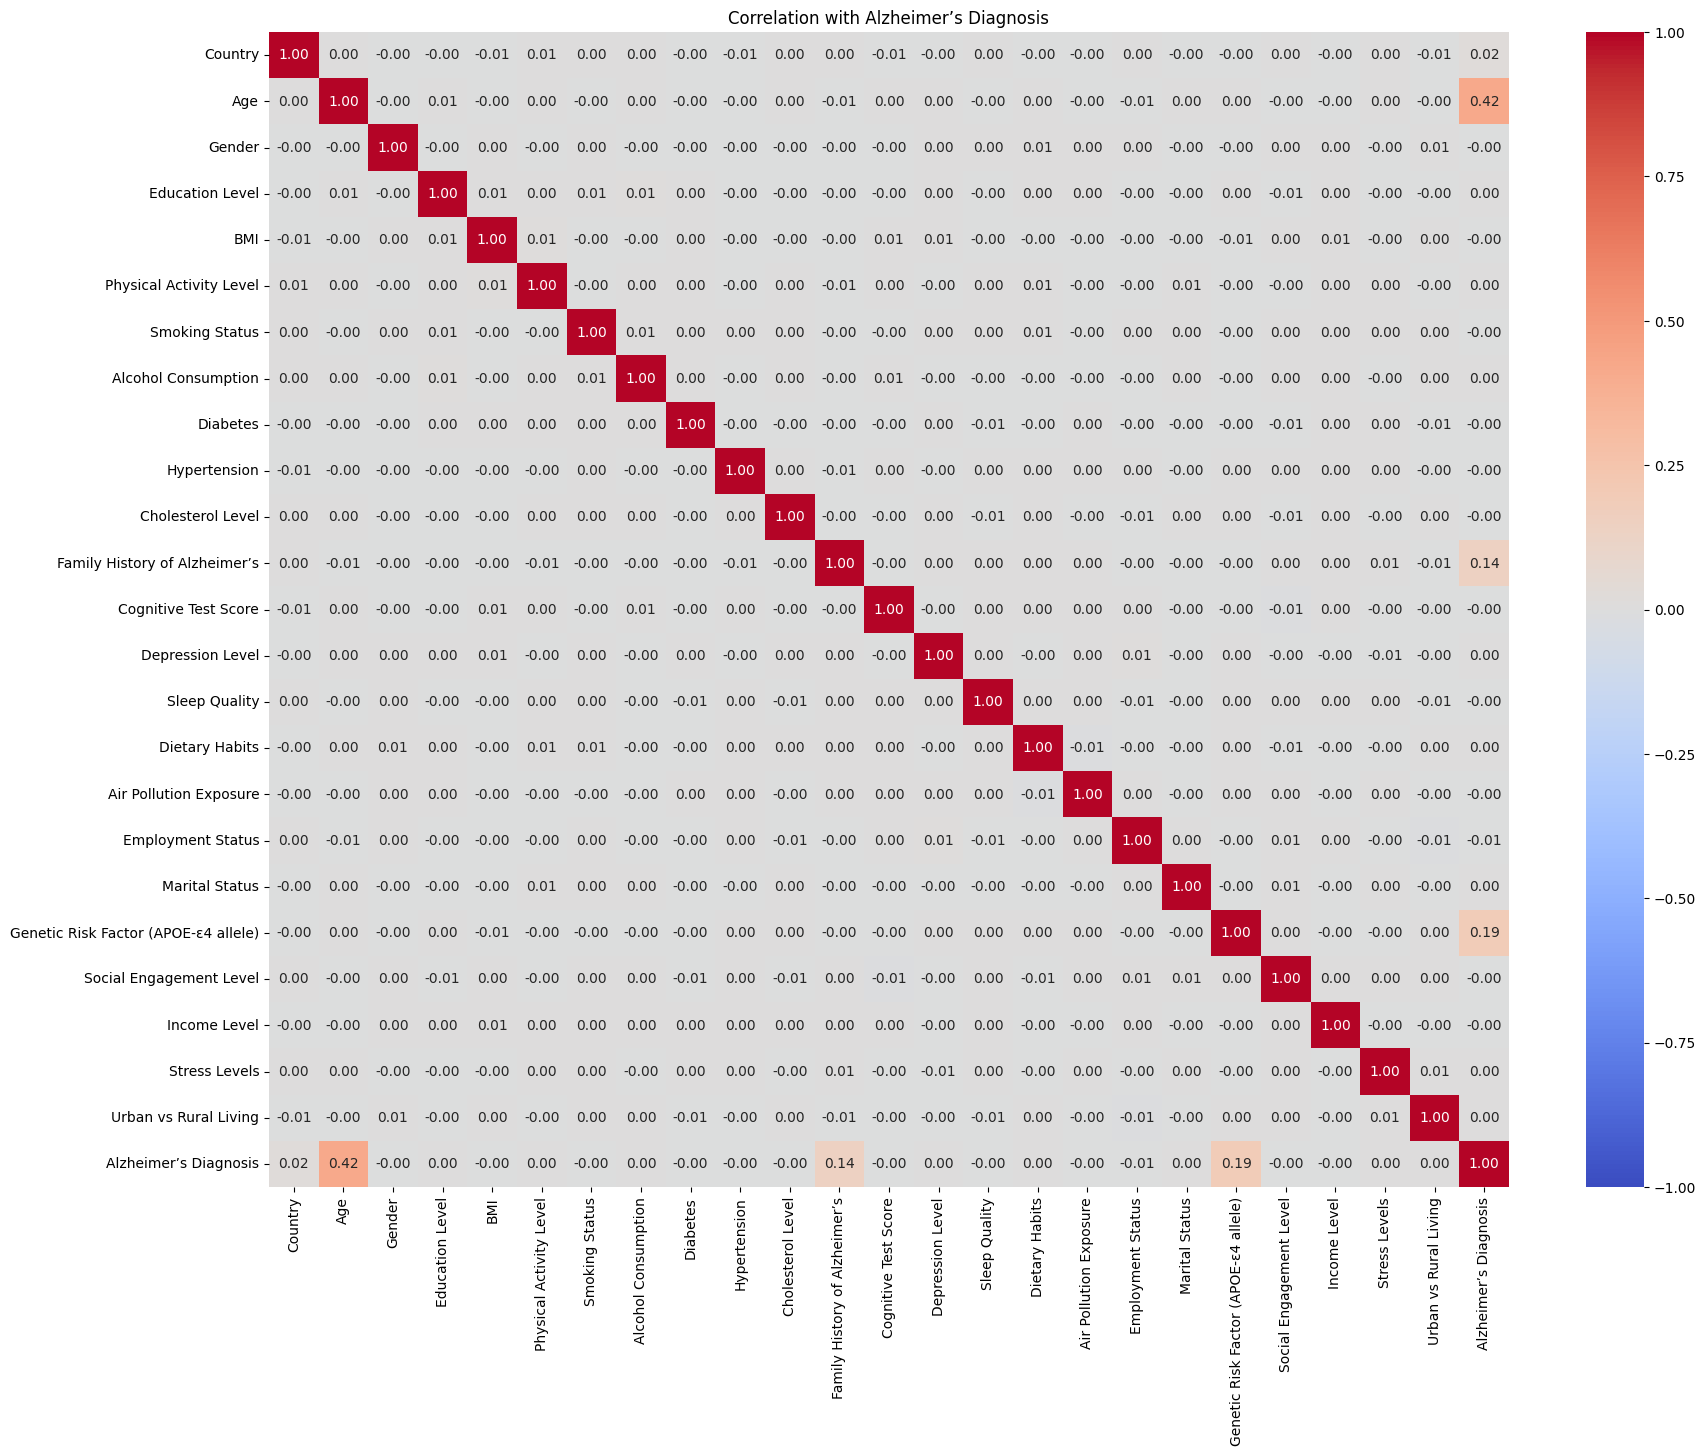

In [ ]:
# Copy the dataframe
df_numeric = df.copy()

variables_2 = ['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living']

# Function to handle categorical data appropriately
def prepare_data_for_plotting(df, var_name):
    series = df[var_name]

    if pd.api.types.is_numeric_dtype(series):
        return series, None

    common_ordinals = {
        'Low': 0, 'Medium': 1, 'High': 2,
        'Poor': 0, 'Fair': 1, 'Good': 2,
        'Never': 0, 'Occasionally': 1, 'Regularly': 2,
        'None': 0, 'Mild': 1, 'Moderate': 2,
    }

    if all(val in common_ordinals for val in series.dropna().unique()):
        return series.map(common_ordinals), {v: k for k, v in common_ordinals.items()}

    categories = series.dropna().unique()
    mapping = {cat: i for i, cat in enumerate(categories)}
    inverse_mapping = {i: cat for i, cat in enumerate(categories)}

    return series.map(mapping), inverse_mapping

# Convert non-numeric columns using your prepare_data_for_plotting function
for var in variables_2 + ["Alzheimer’s Diagnosis"]:
    if not pd.api.types.is_numeric_dtype(df_numeric[var]):
        df_numeric[var], _ = prepare_data_for_plotting(df_numeric, var)

# Now you can compute the correlation matrix
corr = df_numeric[variables_2 + ["Alzheimer’s Diagnosis"]].corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation with Alzheimer’s Diagnosis")
plt.show()

We found that the factors that show significant correlation to Alzheimer's diagnosis are:
- Age, value approximately 0.42
- Family history, value approximately 0.14
- Genetic risk factor, value approximately 0.19

# Difference in Ratio of Alzheimer by Country

First we look at the ratio of Alzheimers diagnosis to the total of participants from each country.

### Ratio of Alzheimer by Country

In [ ]:
# Filter only Alzheimer’s = 'Yes' and count by country
alz_counts = (
    df[df["Alzheimer’s Diagnosis"] == "Yes"]
    .groupby("Country")
    .size()
    .sort_values()
)

alz_counts_no = (
    df[df["Alzheimer’s Diagnosis"] == "No"]
    .groupby("Country")
    .size()
    .sort_values()
)

# Get ordered list of countries based on Alzheimer’s counts
ordered_countries = alz_counts.index.tolist()

# Count total and 'Yes' diagnoses per country
total_counts = df.groupby("Country").size()
yes_counts = df[df["Alzheimer’s Diagnosis"] == "Yes"].groupby("Country").size()

# Compute ratio (Yes / Total)
alz_ratio = (yes_counts / total_counts).sort_values(ascending=False)

# Prepare DataFrame for plotting
alz_ratio_df = alz_ratio.reset_index()
alz_ratio_df.columns = ["Country", "Ratio"]

# Sort by ratio (ascending)
alz_ratio_df_sorted = alz_ratio_df.sort_values("Ratio", ascending=True)

# Define the custom colors for the countries
orange_countries = {"India", "Russia", "South Africa", "Brazil", "Mexico"}
yellow_countries = {"Norway", "Sweden", "Canada", "Japan"}

# Create a color dictionary for each country
colors = []
for country in alz_ratio_df_sorted["Country"]:
    if country in orange_countries:
        colors.append("#F59738")  # Orange
    elif country in yellow_countries:
        colors.append("#F0C537")  # Yellow
    else:
        colors.append("#2770E0")  # Blue

# Prepare the data source
source = ColumnDataSource(data=dict(
    Country=alz_ratio_df_sorted["Country"],
    Alz_Ratio=alz_ratio_df_sorted["Ratio"],
    Color=colors
))

# Create a figure with sorted country list
p = figure(x_range=alz_ratio_df_sorted["Country"].tolist(),
           height=400,
           width=800,
           title="Ratio of Alzheimer's Diagnoses by Country",
           toolbar_location=None,
           tools="")

# Add bars with custom color
p.vbar(x='Country', top='Alz_Ratio', width=0.8, source=source,
       fill_color='Color')

# Hover tool
hover = HoverTool(tooltips=[
    ("Country", "@Country"),
    ("Ratio", "@Alz_Ratio{0.00%}")
])
p.add_tools(hover)

# Style
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 1
p.xaxis.major_label_orientation = 0.8
p.xaxis.axis_label = "Country"
p.yaxis.axis_label = "Ratio of 'Yes' Diagnoses"

# Show the plot
show(p)

# Create full HTML file
html = file_html(p, CDN, "Alzheimer's Diagnoses by Country")

# Save to file
with open("alzheimers_ratio_plot.html", "w", encoding="utf-8") as f:
    f.write(html)

We observed a notiable difference in ratio between the countries and identified three grouping. We wanted to investige this further so we looked at the factors that we have identified correlate with getting an Alzheimer's diagnosis: age, genetic risk factor and family history to see if any of these cause the difference in ratios.

### Age

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd
import numpy as np

# Sample DataFrame structure:
# df = pd.read_csv('your_data.csv')
# Columns: 'Country', 'Age'

# Group data by country and compute stats
ordered_countries = [
    "Japan", "Canada", "Sweden", "Norway",
    "China", "USA", "Italy", "Spain", "France", "Argentina", "Australia",
    "UK", "Germany", "Saudi Arabia", "South Korea",
    "Mexico", "Brazil", "South Africa", "India", "Russia"
]
groups = df.groupby('Country')['Age']
ordered_groups = groups.apply(list).reindex(ordered_countries)
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
mean = groups.mean()
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

# Clip outliers
def outliers(group):
    cat = group.name
    return group[(group > upper[cat]) | (group < lower[cat])]

out = groups.apply(outliers).dropna()

# Define country groups
group1 = {'Japan', 'Canada', 'Sweden', 'Norway'}
group2 = {'Mexico', 'Brazil', 'South Africa', 'Russia', 'India'}

colors = []
for country in ordered_countries:
    if country in group1:
        colors.append("#F0C537")
    elif country in group2:
        colors.append("#F59738")
    else:
        colors.append("#2770E0")

# Add to ColumnDataSource
source = ColumnDataSource(data=dict(
    countries=ordered_countries,
    q1=q1,
    q2=q2,
    q3=q3,
    mean=groups.mean(),
    upper=upper,
    lower=lower,
    color=colors
))


# Set up the figure
p = figure(x_range=ordered_countries, width=800, height=400, title="Age Distribution by Country",
           toolbar_location=None, tools="", y_axis_label="Age")

# Whiskers
p.segment('countries', 'upper', 'countries', 'q3', source=source, line_color="black")
p.segment('countries', 'lower', 'countries', 'q1', source=source, line_color="black")

# Boxes (interquartile range)
boxes = p.vbar('countries', 0.7, 'q2', 'q3', source=source, fill_color='color', line_color="black")
p.vbar('countries', 0.7, 'q1', 'q2', source=source, fill_color='color', line_color="black")

# Whisker caps
p.rect('countries', 'lower', 0.2, 0.01, source=source, line_color="black")
p.rect('countries', 'upper', 0.2, 0.01, source=source, line_color="black")

# Outliers
if not out.empty:
    outx = []
    outy = []
    for cat in ordered_countries:
        if cat in out:
            for val in out[cat]:
                outx.append(cat)
                outy.append(val)
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

# Hover tool
hover = HoverTool(renderers=[boxes],
                  tooltips=[
                      ("Country", "@countries"),
                      ("Mean Age", "@mean{0.0}"),
                      ("Q1 (25%)", "@q1{0.0}"),
                      ("Median (Q2)", "@q2{0.0}"),
                      ("Q3 (75%)", "@q3{0.0}")
                  ])
p.add_tools(hover)

# Rotate x-axis labels
p.xaxis.major_label_orientation = 0.75

# Output
output_file("boxplot_age_by_country.html")


We could not observe any significant differences in age distribution that could cause the difference in ratio of Alzheimer for the different counrties.

### Genetic Risk Factor (APOE-ε4 allele)

In [ ]:
# Filter only Genetic Risk Factor = 'Yes' and count by country
apoe_counts = (
    df[df["Genetic Risk Factor (APOE-ε4 allele)"] == "Yes"]
    .groupby("Country")
    .size()
    .sort_values()
)

# Get ordered list of countries based on APOE-ε4 allele 'Yes' counts
ordered_countries = apoe_counts.index.tolist()

# Count total individuals per country
total_counts = df.groupby("Country").size()

# Count number of individuals with APOE-ε4 allele = 'Yes' per country
apoe_yes_counts = df[df["Genetic Risk Factor (APOE-ε4 allele)"] == "Yes"].groupby("Country").size()

# Compute ratio (Yes / Total) and sort
apoe_ratio = (apoe_yes_counts / total_counts).sort_values(ascending=False)

# Prepare DataFrame for plotting
apoe_ratio_df = apoe_ratio.reset_index()
apoe_ratio_df.columns = ["Country", "Ratio"]

# Reuse country order from Alzheimer's plot
matched_country_order = alz_ratio_df_sorted["Country"].tolist()

# Create a new DataFrame with that order from apoe_ratio_df
apoe_ratio_df_sorted = apoe_ratio_df.set_index("Country").loc[matched_country_order].reset_index()

# Define the same custom colors
orange_countries = {"India", "Russia", "South Africa", "Brazil", "Mexico"}
yellow_countries = {"Norway", "Sweden", "Canada", "Japan"}

# Assign colors based on country
colors = []
for country in apoe_ratio_df_sorted["Country"]:
    if country in orange_countries:
        colors.append("#F59738")  # Orange
    elif country in yellow_countries:
        colors.append("#F0C537")  # Yellow
    else:
        colors.append("#2770E0")  # Blue

# Prepare Bokeh data source
source = ColumnDataSource(data=dict(
    Country=apoe_ratio_df_sorted["Country"],
    Ratio=apoe_ratio_df_sorted["Ratio"],
    Color=colors
))

# Create Bokeh figure
p = figure(x_range=apoe_ratio_df_sorted["Country"].tolist(),
           height=400,
           width=800,
           title="Ratio of Genetic Risk Factor (APOE-ε4 allele) by Country",
           toolbar_location=None,
           tools="")

# Add bars
p.vbar(x='Country', top='Ratio', width=0.8, source=source, fill_color='Color')

# Add hover tool
hover = HoverTool(tooltips=[
    ("Country", "@Country"),
    ("Ratio", "@Ratio{0.00%}")
])
p.add_tools(hover)

# Style
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 1
p.xaxis.major_label_orientation = 0.8
p.xaxis.axis_label = "Country"
p.yaxis.axis_label = "Ratio of 'Yes'"
p.yaxis.axis_label_standoff = 12
p.xaxis.axis_label_standoff = 12

# Show
show(p)

# Save HTML
html3 = file_html(p, CDN, "Ratio Genetic Risk Factor by Country")
with open("risk_factor_by_country_plot.html", "w", encoding="utf-8") as f:
    f.write(html3)

We could not observe any significant differences in genetic risk factor that could cause the difference in ratio of Alzheimer for the different counrties.

### Family History of Alzheimer's Diseas

In [ ]:
# Filter only Family History = 'Yes' and count by country
family_history_counts = (
    df[df["Family History of Alzheimer’s"] == "Yes"]
    .groupby("Country")
    .size()
    .sort_values()
)

# Get ordered list of countries based on Family History 'Yes' counts
ordered_countries = family_history_counts.index.tolist()

# Count total individuals per country
total_counts = df.groupby("Country").size()

# Count number of individuals with Family History = 'Yes' per country
family_history_yes_counts = df[df["Family History of Alzheimer’s"] == "Yes"].groupby("Country").size()

# Compute ratio (Yes / Total) and sort
family_history_ratio = (family_history_yes_counts / total_counts).sort_values(ascending=False)

# Prepare DataFrame for plotting
family_history_ratio_df = family_history_ratio.reset_index()
family_history_ratio_df.columns = ["Country", "Ratio"]

# Assuming df and matched_country_order are already defined

# Count total individuals per country
total_counts = df.groupby("Country").size()

# Count number of individuals with Family History = 'Yes' per country
family_history_yes_counts = df[df["Family History of Alzheimer’s"] == "Yes"].groupby("Country").size()

# Compute ratio (Yes / Total)
family_history_ratio = family_history_yes_counts / total_counts

# Prepare DataFrame
family_history_ratio_df = family_history_ratio.reset_index()
family_history_ratio_df.columns = ["Country", "Ratio"]

# Reorder by matched_country_order
family_history_ratio_df["Country"] = pd.Categorical(family_history_ratio_df["Country"], categories=matched_country_order, ordered=True)
family_history_ratio_df = family_history_ratio_df.sort_values("Country")

# Define color categories
orange_countries = {"India", "Russia", "South Africa", "Brazil", "Mexico"}
yellow_countries = {"Norway", "Sweden", "Canada", "Japan"}

# ✅ Generate color list AFTER sorting
colors = []
for country in family_history_ratio_df["Country"]:
    if country in orange_countries:
        colors.append("#F59738")  # Orange
    elif country in yellow_countries:
        colors.append("#F0C537")  # Yellow
    else:
        colors.append("#2770E0")  # Blue

# Prepare Bokeh data source
source = ColumnDataSource(data=dict(
    Country=family_history_ratio_df["Country"],
    Ratio=family_history_ratio_df["Ratio"],
    Color=colors
))

# Create plot
p = figure(x_range=matched_country_order,
           height=400,
           width=800,
           title="Ratio of Family History of Alzheimer’s by Country",
           toolbar_location=None,
           tools="")

p.vbar(x='Country', top='Ratio', width=0.8, source=source, fill_color='Color')

# Add hover tool
hover = HoverTool(tooltips=[
    ("Country", "@Country"),
    ("Ratio", "@Ratio{0.00%}")
])
p.add_tools(hover)

# Style
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 1
p.yaxis.axis_label = "Ratio of 'Yes'"
p.xaxis.axis_label = "Country"
p.xaxis.major_label_orientation = 0.8
p.yaxis.axis_label_standoff = 12
p.xaxis.axis_label_standoff = 12

# Show
show(p)

# Save HTML
html4 = file_html(p, CDN, "Family History by Country")
with open("family_history_by_country_plot.html", "w", encoding="utf-8") as f:
    f.write(html4)

We could not observe any significant differences in family history that could cause the difference in ratio of Alzheimer for the different countries.

#  World map of Alzheimer’s disease

In parallel with our individual-level analysis, we examined global variations in Alzheimer’s diagnosis rates. We aggregated the diagnosis data by country and visualized it using an interactive choropleth map, which allowed us to explore geographic disparities in a more intuitive way.

The map revealed notable differences in diagnosis rates between countries. While some of these disparities may reflect actual differences in prevalence, we believe they are also influenced by factors such as healthcare infrastructure, access to diagnostic services, and public health reporting standards. In general, countries with well-developed healthcare systems showed higher diagnosis rates, while lower rates may indicate underdiagnosis in regions with fewer medical resources.

To make the map more insightful, we added a filter for age, allowing users to observe how Alzheimer’s prevalence shifts across different age groups. This geographic perspective complements our patient-level analysis by highlighting that Alzheimer’s disease is shaped not only by individual risk factors but also by broader systemic influences.

In [ ]:
import pandas as pd
import geopandas as gpd
import json
from bokeh.io import output_notebook, show
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, Slider, CustomJS, HoverTool
from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.palettes import Blues9 as palette  # Blue palette

df['Diagnosis'] = df['Alzheimer’s Diagnosis'].map({'Yes': 1, 'No': 0})
df = df[df['Country'].notna()]

# Fix country naming mismatch to match GeoJSON
df['Country'] = df['Country'].replace({
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'Russia': 'Russian Federation',
    'South Korea': 'Korea, Republic of',
    'Iran': 'Iran (Islamic Republic of)',
    'Vietnam': 'Viet Nam',
    'Venezuela': 'Venezuela (Bolivarian Republic of)',
    'Bolivia': 'Bolivia (Plurinational State of)',
    'Syria': 'Syrian Arab Republic',
    'Tanzania': 'United Republic of Tanzania',
    'Czechia': 'Czech Republic'
})

# Clean up fields
df['Family History of Alzheimer’s'] = df['Family History of Alzheimer’s'].fillna('Unknown').str.strip()
df['Genetic Risk Factor (APOE-ε4 allele)'] = df['Genetic Risk Factor (APOE-ε4 allele)'].fillna('Unknown').str.strip()
df['Age Group'] = (df['Age'] // 5 * 5).clip(upper=100)

# Unique age groups
age_groups = sorted(df['Age Group'].unique())

# Precompute Alzheimer's rate by age group
combinations = {}
for age in age_groups:
    filtered = df[df['Age Group'] <= age]
    group = filtered.groupby('Country')['Diagnosis'].mean().reset_index()
    group.columns = ['Country', 'Alzheimer Rate']
    combinations[f'{age}'] = group

# Load and prepare world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Helper to create GeoJSON
def make_geojson(age):
    key = f"{age}"
    data = combinations.get(key)
    if data is None:
        data = pd.DataFrame(columns=['Country', 'Alzheimer Rate'])
    merged = world.merge(data, how='left', left_on='NAME', right_on='Country')
    merged['Alzheimer Rate'] = merged['Alzheimer Rate'].fillna(0) * 100
    return json.loads(merged.to_json())

# Initial setting
initial_age = 100

# GeoJSON source and color setup
source = GeoJSONDataSource(geojson=json.dumps(make_geojson(initial_age)))
color_mapper = LinearColorMapper(palette=palette[::-1], low=0, high=100)

# Create figure
p = figure(title="Alzheimer's Diagnosis Rate by Country", width=950, height=500, toolbar_location='below')
p.patches("xs", "ys", source=source,
          fill_color={'field': 'Alzheimer Rate', 'transform': color_mapper},
          line_color="black", line_width=0.3)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

# Color bar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0, 0))
p.add_layout(color_bar, 'right')

# Hover tool
hover = HoverTool(
    tooltips=[
        ("Country", "@NAME"),
        ("Alzheimer Rate", "@{Alzheimer Rate}{0.0}%")
    ]
)
p.add_tools(hover)

# Age slider
age_slider = Slider(title="Max Age", start=40, end=100, value=initial_age, step=5)

# Precompute geojsons
geojson_dict = {
    f"{age}": json.dumps(make_geojson(age))
    for age in age_groups
}

# JS Callback
callback = CustomJS(
    args=dict(source=source, age_slider=age_slider, geojson_dict=geojson_dict),
    code="""
    var age = age_slider.value;
    age = Math.floor(age / 5) * 5;
    var key = age.toString();
    var new_data = geojson_dict[key];
    if (new_data !== undefined) {
        source.geojson = new_data;
    }
"""
)

age_slider.js_on_change('value', callback)

# Show directly in notebook
output_notebook()
layout = column(row(age_slider), p)
show(layout)


# Logistic regression

We chose logistic regression because it is well-suited for modeling the probability of a binary outcome—in our case, whether or not an individual is diagnosed with Alzheimer's disease. Logistic regression estimates the relationship between one or more independent variables and the likelihood of a particular outcome, using the logistic (sigmoid) function to constrain the predicted probabilities between 0 and 1.

To identify which variables were statistically significant predictors of the disease, we applied both forward selection and backward elimination methods.

- Forward selection begins with no variables in the model and adds them one by one, selecting the variable that most improves model performance at each step based on a statistical criterion (p-values in our case).

- Backward elimination, on the other hand, starts with all candidate variables and removes the least significant ones iteratively, also based on a predefined criterion.

Both approaches led to the same conclusion: only age, family history of Alzheimer's, and genetic risk factors were statistically significant predictors of a positive diagnosis. These three features were therefore retained for further analysis.

In [ ]:
df = df.drop(columns=['Country'])

In [ ]:
# Map binary yes/no to 0/1
binary_cols = ['Diabetes', 'Hypertension', 'Family History of Alzheimer’s',
               'Genetic Risk Factor (APOE-ε4 allele)']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Ordered mapping for categorical columns
ordered_mappings = {
    'Alcohol Consumption': {'Never': 0, 'Occasionally': 1, 'Regularly': 2},
    'Physical Activity Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Sleep Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Smoking Status': {'Never': 0, 'Former': 1, 'Current': 2},
    'Social Engagement Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Stress Levels': {'Low': 0, 'Medium': 1, 'High': 2},
    'Urban vs Rural Living': {'Rural': 0, 'Urban': 1},
    'Cholesterol Level': {'Normal': 0 , 'High': 1},
    'Depression Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Dietary Habits': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2},
    'Air Pollution Exposure': {'Low': 0, 'Medium': 1, 'High': 2},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2}
}
for col, mapping in ordered_mappings.items():
    df[col] = df[col].map(mapping)

In [ ]:
# Encode target variable
df['Alzheimer’s Diagnosis'] = df['Alzheimer’s Diagnosis'].map({'Yes': 1, 'No': 0})

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Employment Status', 'Marital Status'], drop_first=True)


In [ ]:
# Drop non-feature columns if needed (like Index)
X = df.drop(columns=['Alzheimer’s Diagnosis'])
y = df['Alzheimer’s Diagnosis']


In [ ]:
# Convert all to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs that may have resulted
X = X.dropna()
y = y.loc[X.index]  # Ensure y stays aligned with X
y = pd.to_numeric(y, errors='coerce')


In [ ]:
# Convert bool to int
X = X.astype({col: 'int64' for col in X.select_dtypes(include='bool').columns})


In [ ]:
import statsmodels.api as sm
import pandas as pd

# X = your features DataFrame
# y = your target variable (e.g., df['Alzheimer’s Diagnosis'])

# Add a constant for the intercept term
X = sm.add_constant(X)

# Start with all features
selected_features = list(X.columns)

# Backward elimination loop
p_value_threshold = 0.05
while len(selected_features) > 0:
    X_selected = X[selected_features]
    model = sm.Logit(y, X_selected).fit(disp=False)
    p_values = model.pvalues
    max_p_value = p_values.max()
    if max_p_value > p_value_threshold:
        excluded_feature = p_values.idxmax()
        print(f"Dropping '{excluded_feature}' (p = {max_p_value:.4f})")
        selected_features.remove(excluded_feature)
    else:
        break

# Final model
final_model = sm.Logit(y, X[selected_features]).fit()
print(final_model.summary())


Dropping 'BMI' (p = 0.9584)
Dropping 'Depression Level' (p = 0.9504)
Dropping 'Cognitive Test Score' (p = 0.8885)
Dropping 'Hypertension' (p = 0.8694)
Dropping 'Diabetes' (p = 0.8427)
Dropping 'Alcohol Consumption' (p = 0.8409)
Dropping 'Education Level' (p = 0.8303)
Dropping 'Income Level' (p = 0.7844)
Dropping 'Marital Status_Widowed' (p = 0.7785)
Dropping 'Smoking Status' (p = 0.7318)
Dropping 'Gender_Male' (p = 0.6649)
Dropping 'Physical Activity Level' (p = 0.5872)
Dropping 'Marital Status_Single' (p = 0.5124)
Dropping 'Employment Status_Unemployed' (p = 0.4922)
Dropping 'Employment Status_Retired' (p = 0.5030)
Dropping 'Sleep Quality' (p = 0.4896)
Dropping 'Stress Levels' (p = 0.3488)
Dropping 'Social Engagement Level' (p = 0.3339)
Dropping 'Cholesterol Level' (p = 0.2379)
Dropping 'Dietary Habits' (p = 0.2306)
Dropping 'Air Pollution Exposure' (p = 0.2096)
Dropping 'Urban vs Rural Living' (p = 0.1109)
Optimization terminated successfully.
         Current function value: 0.54873

In [ ]:
import statsmodels.api as sm

def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    selected_features = []

    while remaining_features:
        best_pval = 1
        best_feature = None

        for feature in remaining_features:
            features_to_test = initial_features + [feature]
            X_selected = sm.add_constant(X[features_to_test])
            model = sm.Logit(y, X_selected).fit(disp=False)
            pval = model.pvalues[feature]

            if pval < best_pval:
                best_pval = pval
                best_feature = feature

        if best_pval < significance_level:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            selected_features.append(best_feature)
            print(f"Added: {best_feature} (p = {best_pval:.4f})")
        else:
            break

    final_model = sm.Logit(y, sm.add_constant(X[selected_features])).fit()
    return final_model, selected_features


In [ ]:
final_model, selected_features = forward_selection(X, y)
print("Selected features:", selected_features)
print(final_model.summary())


Added: const (p = 0.0000)
Added: Age (p = 0.0000)
Added: Family History of Alzheimer’s (p = 0.0000)
Added: Genetic Risk Factor (APOE-ε4 allele) (p = 0.0000)
Optimization terminated successfully.
         Current function value: 0.548739
         Iterations 6
Selected features: ['const', 'Age', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)']
                             Logit Regression Results                            
Dep. Variable:     Alzheimer’s Diagnosis   No. Observations:                74283
Model:                             Logit   Df Residuals:                    74279
Method:                              MLE   Df Model:                            3
Date:                   Fri, 09 May 2025   Pseudo R-squ.:                  0.1908
Time:                           12:27:54   Log-Likelihood:                -40762.
converged:                          True   LL-Null:                       -50371.
Covariance Type:               nonrobust   LLR p-value:   

We chose this type of data visualization because it clearly illustrates the modeled probability based on the selected significant variable values.

In [ ]:
import pandas as pd
import numpy as np
import pickle
from bokeh.plotting import figure, output_file, save
from bokeh.models import ColumnDataSource, Select, HoverTool, CustomJS
from bokeh.layouts import column, row


# Simulate Age from 40 to 100
age_range = np.arange(40, 101)

# Precompute predictions for all 4 combinations
def make_X(fh, gr):
    return pd.DataFrame({
        'const': 1,
        'Age': age_range,
        'Family History of Alzheimers': fh,
        'Genetic Risk Factor': gr
    })

X_sim00 = make_X(0, 0)
X_sim01 = make_X(0, 1)
X_sim10 = make_X(1, 0)
X_sim11 = make_X(1, 1)

probs00 = final_model.predict(X_sim00)
probs01 = final_model.predict(X_sim01)
probs10 = final_model.predict(X_sim10)
probs11 = final_model.predict(X_sim11)

# Set up source and plot
source = ColumnDataSource(data=dict(age=age_range, probs=probs00))

p = figure(title="Predicted Probability of Alzheimer’s vs Age",
           x_axis_label="Age", y_axis_label="Predicted Probability",
           width=800, height=400,
           y_range=(0, 1),
           tooltips=[("Age", "@age"), ("Probability", "@probs{0.000}")])

p.line('age', 'probs', source=source, line_width=2, color="#2770E0")

# Hover tool
hover = HoverTool(tooltips=[("Age", "@age"), ("Probability", "@probs{0.000}")], mode='vline')
p.add_tools(hover)

# Dropdowns
family_history_select = Select(title="Family History of Alzheimer's", value="No", options=["No", "Yes"])
genetic_risk_select = Select(title="Genetic Risk Factor", value="No", options=["No", "Yes"])

# CustomJS callback for interactivity
callback = CustomJS(args=dict(source=source, fh_select=family_history_select, gr_select=genetic_risk_select,
                              probs00=probs00.tolist(), probs01=probs01.tolist(),
                              probs10=probs10.tolist(), probs11=probs11.tolist()), code="""
    var fh = fh_select.value == "Yes" ? 1 : 0;
    var gr = gr_select.value == "Yes" ? 1 : 0;
    var age = source.data['age'];
    var probs = [];

    // Simulate the probabilities based on the selected values of FH and GR
    for (var i = 0; i < age.length; i++) {
        if (fh == 0 && gr == 0) {
            probs.push(probs00[i]);
        } else if (fh == 0 && gr == 1) {
            probs.push(probs01[i]);
        } else if (fh == 1 && gr == 0) {
            probs.push(probs10[i]);
        } else {
            probs.push(probs11[i]);
        }
    }
    source.data['probs'] = probs;
    source.change.emit();
""")

# Add callback to the dropdowns
family_history_select.js_on_change('value', callback)
genetic_risk_select.js_on_change('value', callback)

# Layout
layout = column(row(family_history_select, genetic_risk_select), p)

# Save plot as HTML file
output_file("alzheimers_prediction_plot.html")
save(layout)


# Correlation - Difference in Ratio of Alzheimer by Country and Health Care Systems



### Additional Datasets

Since there are no significant differences in age distribution, prevalence of family history, and ratio of genetic risk factors, we can likely rule them out as explanations for the variation in Alzheimer’s diagnoses. Given that these aspects are not major differentiators, what other factors could be driving these differences?

Our theory was that the external factor, the health care system, could be part of the answer. One way of assessing health care systems is by looking at the health care index. There are many different systems for measuring and comparing these values, therefore we look at 3 different rating systems: Numbeo, CEOWorld, and EU. Numbeo dataset from 2025 considers factors such as "medical professionals, equipment, staff, doctors, and costs. It provides an assessment of the healthcare infrastructure, services, and resources available in a specific location." [1] CEOWORLD dataset from 2024 healthcare infrastructure; healthcare professionals competencies; cost; quality medicine availability, and government readiness [2]. EU dataset from 2018 "Findings from the Global Burden of Disease (GBD) study are used to estimate a summary measure of healthcare access and quality." [3]

#### Sources

[1] Numbeo. (2025). Health Care Index by Country 2025.https://www.numbeo.com/health-care/rankings_by_country.jsp

[2] CEOWORLD Magazine. (2024, April 2). Countries with the best health care systems, 2024. https://ceoworld.biz/2024/04/02/countries-with-the-best-health-care-systems-2024/

[3] European Commission, Joint Research Centre. (2018). Healthcare Access and Quality Index. https://composite-indicators.jrc.ec.europa.eu/explorer/indices/haqi/healthcare-access-and-quality-index



In [ ]:
df2 = pd.DataFrame({
    "Country": ['Japan', 'Canada', 'Sweden', 'Norway', 'China', 'USA', 'Italy', 'Spain',
                'France', 'Argentina', 'Australia', 'UK', 'Germany', 'Saudi Arabia',
                'South Korea', 'Mexico', 'Brazil', 'South Africa', 'India', 'Russia'],
    "EU_place": [12, 14, 8, 2, 48, 29, 9, 19, 20, 84, 5, 23, 18, 52, 25, 91, 96, 127, 145, 58],
    "EU_value": [94.10, 93.80, 95.50, 96.60, 77.90, 88.70, 94.90, 91.90, 91.70, 68.10,
                95.90, 90.50, 92.00, 77.10, 90.30, 66.30, 63.80, 49.70, 41.20, 75.10],
    "Numbeo_place": [3, 31, 32, 14, 35, 33, 46, 8, 7, 39, 23, 21, 25, 54, 2, 26, 63, 52, 48, 56],
    "Numbeo_value": [80.0, 68.7, 68.3, 75.6, 68.7, 67.8, 65.1, 77.3, 77.7, 68.0, 73.4,
                     72.7, 71.9, 61.8, 82.8, 72.5, 59.1, 63.8, 65.5, 61.5],
    "CEOWORLD_place": [13, 4, 5, 9, 62, 15, 29, 31, 30, 85, 3, 32, 8, 50, 2, 61, 52, 89, 38, 56],
    "CEOWORLD_value": [59.5, 71.3, 70.7, 64.7, 41.4, 56.7, 49.6, 48.1, 48.3, 43.1, 74.1,
                       47.1, 64.7, 44.4, 77.7, 72.4, 65.4, 59.7, 45.8, 42.3],
})
display(df2)

,Country,EU_place,EU_value,Numbeo_place,Numbeo_value,CEOWORLD_place,CEOWORLD_value
0,Japan,12,94.1,3,80.0,13,59.5
1,Canada,14,93.8,31,68.7,4,71.3
2,Sweden,8,95.5,32,68.3,5,70.7
3,Norway,2,96.6,14,75.6,9,64.7
4,China,48,77.9,35,68.7,62,41.4
5,USA,29,88.7,33,67.8,15,56.7
6,Italy,9,94.9,46,65.1,29,49.6
7,Spain,19,91.9,8,77.3,31,48.1
8,France,20,91.7,7,77.7,30,48.3
9,Argentina,84,68.1,39,68.0,85,43.1


### Normalizing Datasets

They use different scales so we normalized all three so that they were comparable.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Copy original dataframe to avoid altering it
df2_normalized = df2.copy()

# Define the columns to normalize
value_cols = ["EU_value", "Numbeo_value", "CEOWORLD_value"]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df2_normalized[[col + "_norm" for col in value_cols]] = scaler.fit_transform(df2[value_cols])

# Display the normalized values
display(df2_normalized[[ "Country"] + [col + "_norm" for col in value_cols]])


,Country,EU_value_norm,Numbeo_value_norm,CEOWORLD_value_norm
0,Japan,0.954874,0.881857,0.498623
1,Canada,0.949458,0.405063,0.823691
2,Sweden,0.980144,0.388186,0.807163
3,Norway,1.000000,0.696203,0.641873
4,China,0.662455,0.405063,0.000000
5,USA,0.857401,0.367089,0.421488
6,Italy,0.969314,0.253165,0.225895
7,Spain,0.915162,0.767932,0.184573
8,France,0.911552,0.784810,0.190083
9,Argentina,0.485560,0.375527,0.046832


### Pearson Correlation Coefficient

In [ ]:
from scipy.stats import pearsonr

# 1. Alzheimer’s ratio (as before)
total_counts = df.groupby("Country").size()
yes_counts = df[df["Alzheimer’s Diagnosis"] == "Yes"].groupby("Country").size()
alz_ratio = (yes_counts / total_counts).sort_index()
alz_ratio_df = alz_ratio.reset_index()
alz_ratio_df.columns = ["Country", "Alz_Ratio"]

# 2. Merge with health index data
merged = pd.merge(alz_ratio_df, df2, on="Country")

merged["Avg_value"] = merged[["EU_value", "Numbeo_value", "CEOWORLD_value"]].mean(axis=1)
merged["Avg_place"] = merged[["EU_place", "Numbeo_place", "CEOWORLD_place"]].mean(axis=1)

# Correlation between Alzheimer's ratio and average health index score
corr_value, p_value = pearsonr(merged['Avg_value'], merged['Alz_Ratio'])
print(f"Correlation (Avg_value vs Alz_Ratio): r = {corr_value:.3f}, p = {p_value:.3f}")

# Correlation between Alzheimer's ratio and average health index rank
corr_place, p_place = pearsonr(merged['Avg_place'], merged['Alz_Ratio'])
print(f"Correlation (Avg_place vs Alz_Ratio): r = {corr_place:.3f}, p = {p_place:.5f}")

Correlation (Avg_value vs Alz_Ratio): r = -0.685, p = 0.001
Correlation (Avg_place vs Alz_Ratio): r = 0.788, p = 0.00004


Correlation (Avg_value vs Alz_Ratio): r = -0.685, p = 0.001

Correlation (Avg_place vs Alz_Ratio): r = 0.788, p = 0.00004

We calculated the Pearson correlation coefficient to assess the linear relationship between a country’s Alzheimer’s diagnosis ratio and its health system quality, using both average health index scores and ranks. For the average score, the correlation was r = -0.685, p = 0.001, indicating a moderately strong, statistically significant negative relationship. In contrast, the correlation with average rank was r = 0.788, p = 0.00004, reflecting a strong positive relationship. These results suggest that countries with better health systems — reflected in higher scores and better (i.e., lower) ranks — tend to have lower proportions of Alzheimer’s diagnoses in this dataset.

### Visualizations of Correlation to Different Datasets

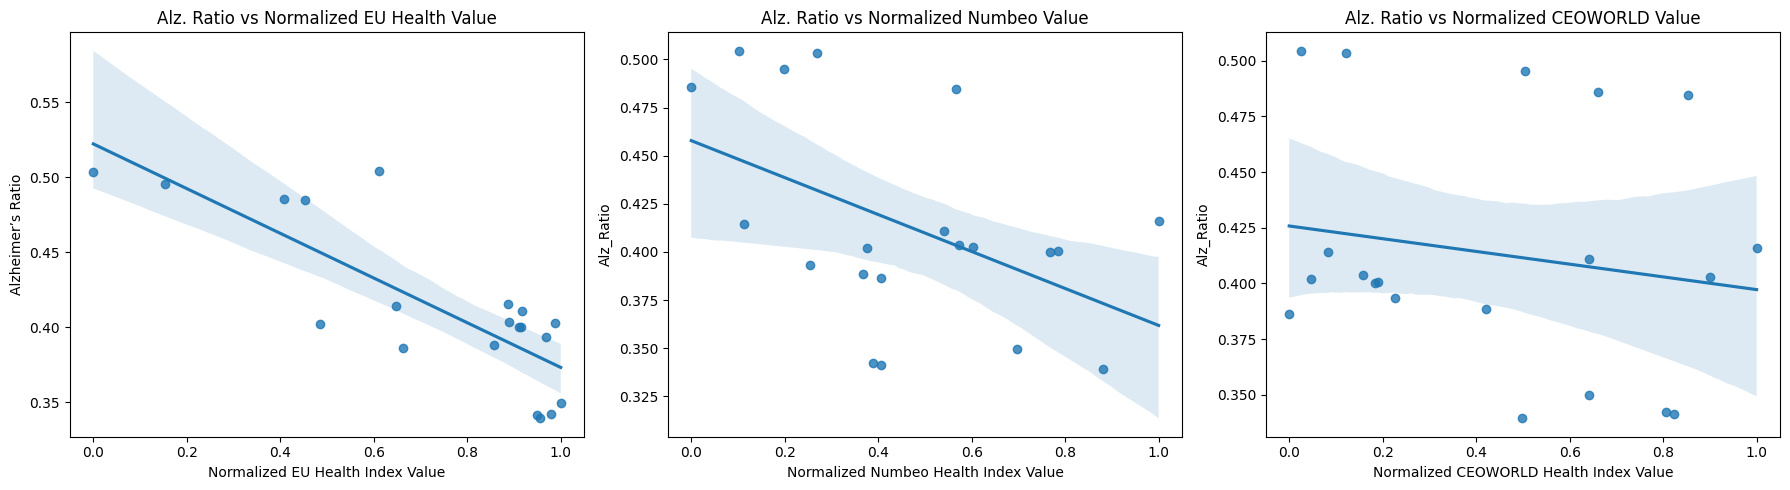

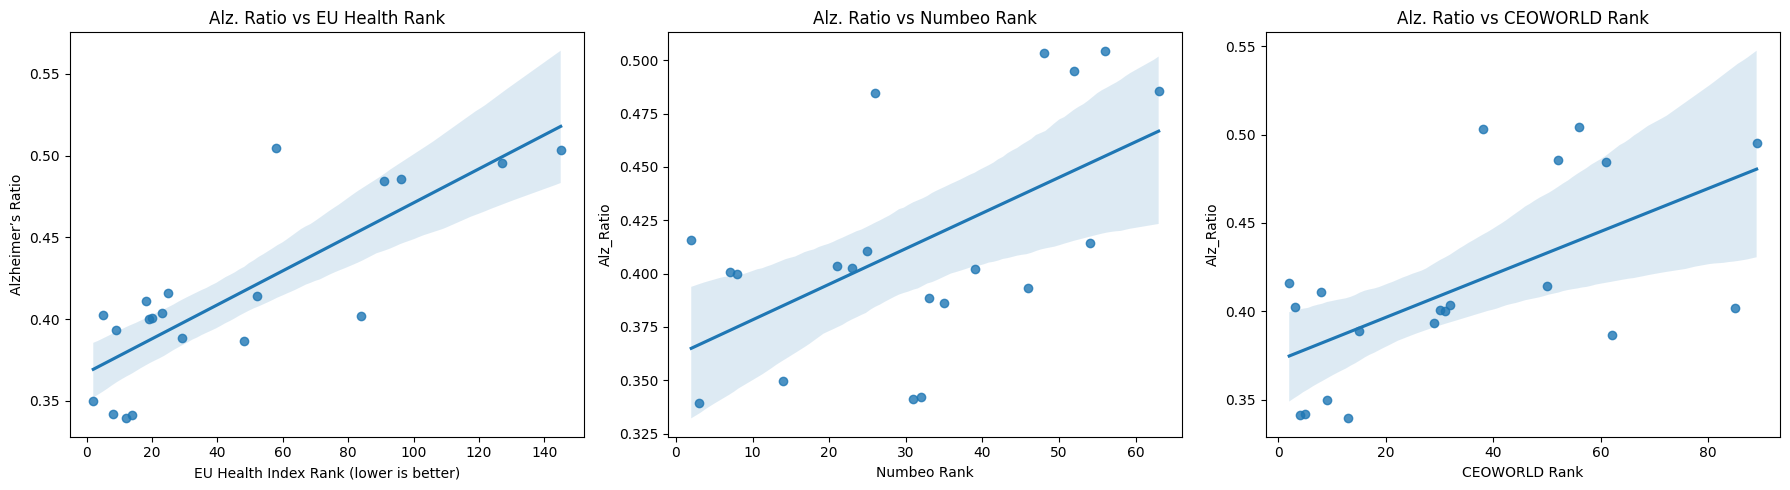

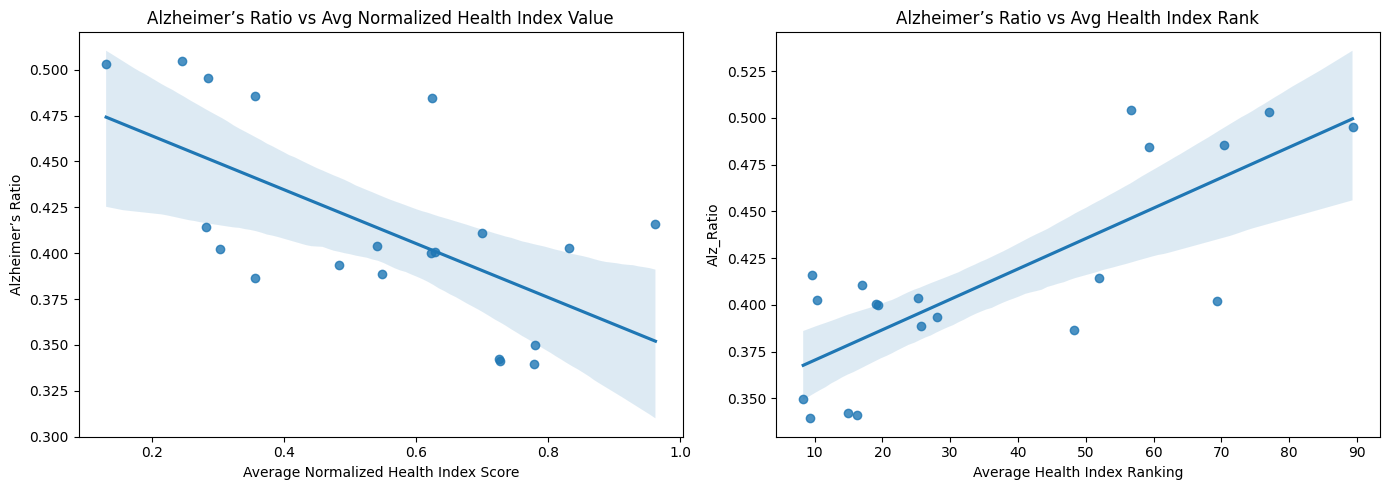

In [ ]:
# Merge the Alzheimer’s ratio data with the normalized health index values
merged = pd.merge(alz_ratio_df, df2_normalized, on="Country")

# Plot: Alzheimer’s ratio vs Normalized Health index *values* (higher is better)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(data=merged, x='EU_value_norm', y='Alz_Ratio', ax=axs[0])
axs[0].set_title("Alz. Ratio vs Normalized EU Health Value")
axs[0].set_xlabel("Normalized EU Health Index Value")
axs[0].set_ylabel("Alzheimer’s Ratio")

sns.regplot(data=merged, x='Numbeo_value_norm', y='Alz_Ratio', ax=axs[1])
axs[1].set_title("Alz. Ratio vs Normalized Numbeo Value")
axs[1].set_xlabel("Normalized Numbeo Health Index Value")

sns.regplot(data=merged, x='CEOWORLD_value_norm', y='Alz_Ratio', ax=axs[2])
axs[2].set_title("Alz. Ratio vs Normalized CEOWORLD Value")
axs[2].set_xlabel("Normalized CEOWORLD Health Index Value")

plt.tight_layout()
plt.show()

# Plot: Alzheimer’s ratio vs Normalized Health index *rankings* (lower is better)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Note: higher ranking number = worse health care
sns.regplot(data=merged, x='EU_place', y='Alz_Ratio', ax=axs[0])
axs[0].set_title("Alz. Ratio vs EU Health Rank")
axs[0].set_xlabel("EU Health Index Rank (lower is better)")
axs[0].set_ylabel("Alzheimer’s Ratio")

sns.regplot(data=merged, x='Numbeo_place', y='Alz_Ratio', ax=axs[1])
axs[1].set_title("Alz. Ratio vs Numbeo Rank")
axs[1].set_xlabel("Numbeo Rank")

sns.regplot(data=merged, x='CEOWORLD_place', y='Alz_Ratio', ax=axs[2])
axs[2].set_title("Alz. Ratio vs CEOWORLD Rank")
axs[2].set_xlabel("CEOWORLD Rank")

plt.tight_layout()
plt.show()

# Calculate average values and ranks (using normalized health values)
merged["Avg_value_norm"] = merged[["EU_value_norm", "Numbeo_value_norm", "CEOWORLD_value_norm"]].mean(axis=1)
merged["Avg_place"] = merged[["EU_place", "Numbeo_place", "CEOWORLD_place"]].mean(axis=1)

# Plot average value-based and placement-based comparisons
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Value-based (higher is better)
sns.regplot(data=merged, x='Avg_value_norm', y='Alz_Ratio', ax=axs[0])
axs[0].set_title("Alzheimer’s Ratio vs Avg Normalized Health Index Value")
axs[0].set_xlabel("Average Normalized Health Index Score")
axs[0].set_ylabel("Alzheimer’s Ratio")

# Placement-based (lower is better)
sns.regplot(data=merged, x='Avg_place', y='Alz_Ratio', ax=axs[1])
axs[1].set_title("Alzheimer’s Ratio vs Avg Health Index Rank")
axs[1].set_xlabel("Average Health Index Ranking")

plt.tight_layout()
plt.show()

### Final Visualization of Correlation

In [ ]:
from bokeh.models import LabelSet

# Define custom colors
orange_countries = {"India", "Russia", "South Africa", "Brazil", "Mexico"}
yellow_countries = {"Norway", "Sweden", "Canada", "Japan"}

colors = []
x_offsets = []
y_offsets = []
alignments = []

for idx, row in merged.iterrows():
    country = row["Country"]

    # Color
    if country in orange_countries:
        colors.append("#F59738")
    elif country in yellow_countries:
        colors.append("#F0C537")
    else:
        colors.append("#2770E0")

    # Default offsets
    x_off = 5
    y_off = 0
    align = 'left'

    # Custom offset tweaks
    if country == "South Korea":
        x_off = -5
        align = 'right'
    elif country == "France":
        y_off = 5
    elif country == "Spain":
        x_off = 10
        y_off = -17
        align = 'right'
    elif country == "Sweden":
        x_off = -5
        y_off = 4
        align = 'right'
    elif country == "Canada":
        x_off = -5
        y_off = -10
        align = 'right'

    x_offsets.append(x_off)
    y_offsets.append(y_off)
    alignments.append(align)

# Regression line
x = merged["Avg_value_norm"]
y = merged["Alz_Ratio"]
slope, intercept = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept

# Data sources
source = ColumnDataSource(data=dict(
    Avg_value_norm=x,
    Alz_Ratio=y,
    Country=merged["Country"],
    Color=colors,
    x_offset=x_offsets,
    y_offset=y_offsets,
    align=alignments
))
line_source = ColumnDataSource(data=dict(x=x_line, y=y_line))

# Create figure
p = figure(title="Alzheimer’s Ratio vs Avg Normalized Health Index Value",
           x_axis_label="Average Normalized Health Index Score",
           y_axis_label="Alzheimer’s Ratio",
           height=500,
           width=800,
           tools="pan,wheel_zoom,box_zoom,reset")

# Points
p.scatter('Avg_value_norm', 'Alz_Ratio', size=8, source=source,
          color='Color', alpha=0.6)

# Regression line
p.line('x', 'y', source=line_source, line_width=2, color='black', legend_label='Linear Fit')

# Hover
hover = HoverTool(tooltips=[
    ("Country", "@Country"),
    ("Avg Health Index", "@Avg_value_norm{0.00}"),
    ("Alz Ratio", "@Alz_Ratio{0.00%}")
])
p.add_tools(hover)

# Labels with offsets and alignment
labels = LabelSet(x='Avg_value_norm', y='Alz_Ratio', text='Country',
                  x_offset='x_offset', y_offset='y_offset',
                  text_align='align', source=source,
                  text_font_size="8pt", text_alpha=0.7)
p.add_layout(labels)

# Show plot
show(p)

# Create full HTML file
html5 = file_html(p, CDN, "Health Index by Country")

# Save to file
with open("health_index_plot.html", "w", encoding="utf-8") as f:
    f.write(html5)

#### Sources

For the 3 possible explanations on the website of why the ratio distribution by country is the way it is.

[4] Alzheimer's Association. (n.d.). Public health approach to Alzheimer's. https://www.alz.org/professionals/public-health/public-health-approach

[5] Alzheimer’s Society UK. (n.d.). Risk factors for Alzheimer's disease. https://www.alzheimers.org.uk/about-dementia/types-dementia/who-gets-alzheimers-disease

[6] Whitmer, R. A., et al. (2005). Midlife cardiovascular risk factors and risk of dementia in late life. *Neurology*, 64(2), 277–281. https://doi.org/10.1212/01.WNL.0000149519.47454.F2

[7] World Health Organization. (2021). Global status report on the public health response to dementia. https://www.who.int/publications/i/item/9789240033245

# Genre. Which genre of data story did you use?

Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

### Genre and Design Strategies

This project follows the **magazine style** genre, as defined by Segel & Heer (2010). In this structure, the user scrolls through a narrative that weaves together explanatory text and embedded visualizations. Each section addresses a different aspect of the research question—**"Who is more prone to Alzheimer’s disease?"**—and supports the narrative with relevant data and graphics.

### Visual Narrative Tools

- **Visual Structuring**: Establishing shots and consistent color schemes help orient the viewer.
- **Highlighting**: Custom color palettes (e.g., orange vs. blue) emphasize key comparisons.
- **Transition Guidance**: The narrative progresses linearly, guiding the reader through the analysis using headlines and layout.

### Narrative Structure Tools

- **Ordering**: The narrative is primarily author-driven but includes interactive visualizations that allow for reader-driven exploration, for example with the interactive plot of logistic regression where the user can choose to alter the plot with "Family History" and "Genetic Risk Factor".
- **Messaging**: Titles and descriptions make each visual’s message clear, often using annotations or callouts for emphasis.
- **Interactivity**: Hover effects and sliders (e.g., in the choropleth map) provide on-demand insights and enable user engagement.

These choices support a storytelling experience that is informative, accessible, and engaging, while still grounded in rigorous data analysis.


# Visualizations

Summary : Explain the visualizations you've chosen.
Why are they right for the story you want to tell?

**1. Comparing Diagnosed vs Non-Diagnosed Groups**
In the Typical Patient section, histograms and countplots were used to show how common certain traits were among people with and without a diagnosis. For example, we looked at age distribution, genetic risk, and family history. These kinds of plots make it easy to compare the two groups side by side and spot clear patterns.

This worked well for identifying differences between groups and seeing which factors stand out among Alzheimer’s patients.

**2. World Map of Diagnosis Rates**
In the Alzheimer’s in the World section, we created an interactive map using Bokeh. It shows how Alzheimer’s diagnosis rates vary across countries and how those rates change based on age. Users can move a slider to adjust the maximum age.

This map helps show global trends and lets us explore the idea that countries with better healthcare systems might have higher diagnosis rates—not necessarily because more people have the disease, but because more people are tested.

**3. Logistic Regression Plot**
To show the results from our logistic regression model, we created an interactive line plot. It lets you see how the probability of having Alzheimer’s changes depending on age, family history, and genetic risk. You can switch between combinations to simulate different profiles.

This was a good way to make the regression model more visual and intuitive, rather than just showing coefficients or numbers.

**4. Exploring Other Social Factors**
In the Descriptive Insights section, we used more countplots and histograms to look at other variables like stress, physical activity, and smoking. Even though these didn’t end up being the most important predictors, we still wanted to explore them and see how they differed across groups.

These helped give a broader picture and supported the idea that social and lifestyle factors are important to consider.




### Difference in Ratio of Alzheimer by Country

To explore and communicate differences in Alzheimer's disease risk and diagnosis across countries, we chose a series of bar plots and a box plot. These visualizations are well-suited for comparative, categorical data and allow for both country-by-country comparison and pattern recognition related to Alzheimer's risk factors.

Why these plots are right for the storytelling:
1. Bar Plot: Ratio of Alzheimer’s Diagnoses by Country
  - This plot shows the proportion of participants diagnosed with Alzheimer’s in each country, normalized by the total number of participants. This is appropriate because it adjusts for different sample sizes, highlighting relative risk rather than absolute counts.  
2. Box Plot: Age Distribution by Country
  - A box plot is ideal to display distribution, median age, and variation within each country. This helps us understand whether high diagnosis ratios are due to older populations or other factors like genetics or family history. It is relevant to decide if the difference in diagnosis ratio is caused by this identified correlated factor.
3. Bar Plot: Ratio of Genetic Risk Factor (APOE-ε4 allele) by Country
  - This visualizes the proportion of participants in each country with a known genetic marker linked to Alzheimer’s. It is relevant to decide if the difference in diagnosis ratio is caused by this identified correlated factor.
4. Bar Plot: Ratio of Family History of Alzheimer’s by Country
  - This plot illustrates the prevalence of self-reported family history, which does influence Alzheimer's diagnosis. It is relevant to decide if the difference in diagnosis ratio is caused by this identified correlated factor.

Generally why bar plots and box plots are right for the storytelling:
- Bar plots are suite for country-by-country comparison and pattern recognition related to Alzheimer's risk factors for several reasons. They are suited for categorizal data, such as a list of countries. Humans are very good at comparing linear distances, especially when bars share a common baseline (which vertical bars do). This is better than comparing angles (as in pie charts) or area (as in bubble charts), which are much harder for the eye to estimate accurately. Ordered bars (by sorting from lowest to highest) let the viewer immediately recognize trends, such as which countries have the highest or lowest ratio of Alzheimer's diagnoses. This structure supports identifying outliers, clusters, or gradual changes across countries. Vertical bars with labels below follow a left-to-right reading direction, supporting easy navigation and memory. Bars pointing upward are intuitive for showing “more”, which fits with ratios (e.g., more Alzheimer’s diagnoses, more genetic risk).
- Box plots capture five key statistics: minimum, 25th percentile (Q1), median (Q2), 75th percentile (Q3), and maximum, all at once. This is works well for understanding the spread of ages, not just averages. When you stack box plots side by side, you can directly compare Which country has the oldest median age of diagnosis, Where there’s the greatest variation in age, Whether some countries have outliers (like unusually young or old cases). Box plots are compact and can fit many countries side by side without clutter. While box plots are slightly more abstract than bar plots, they still rely on position and length for interpreting values — which our eyes are good at detecting.
- Color The use of consistent color coding (orange, blue and yellow for the three grouping) supports easy cross-referencing across all plots.
- X-axis labels order is consistent to supports easy cross-referencing across all plots.

### Correlation

We chose a scatter plot with a regression line to visualize the relationship between the average normalized health index score and the Alzheimer’s diagnosis ratio by country.

This visualization is well-suited for the story because it allows to directly explore whether there is a correlation between healthcare quality and Alzheimer’s diagnosis rates. Each point represents a country, and by positioning countries according to their health index (x-axis) and Alzheimer’s ratio (y-axis), the plot reveals the overall trend: whether countries with better healthcare tend to detect Alzheimer’s more or less often.

The regression line adds value by making this relationship visually clear — it helps the viewer see whether there’s a positive or negative trend, even if the points are somewhat scattered.

We also used color coding and labels to highlight specific groups of countries the same way we have done in the bar and box plots for exploring the ratio of Alzheimer's diagnosis in different countries. This way the last plot is connected to the others, and to the knowledge the reader has obtained throughout the reading.

By labeling each country and adjusting the label positions, the plot stays readable while showing both the individual data points and the general pattern. This supports a more nuanced interpretation, such as outliers where a country has a high health index but a low Alzheimer’s diagnosis rate (or vice versa).

Overall, this visualization:
- Quantifies the relationship with a trendline and correlation coefficient.
- Provides country-level detail with hover and labels.
- Tells a clear story about how healthcare access and diagnostic patterns may (or may not) be connected globally.

# Discussion. Think critically about your creation

What went well?,
What is still missing? What could be improved?, Why?


What went well?
We explored and investigated the date thoughrowly and systematically so that we ended up with a good understanding of it as a whole and detailed in several aspects. Although the dataset didn't show what we expected (that more lifestyle and other factors would correlate with the disease, and not just factors a person can't influence), we found and interesting story to tell about the ratio of patients getting diagnosed in the different countries.

We also sucsessfully digged depper into the data and apllied statistical modelling on it by doing the linear regression, which gave us unexpected results.

Moreover, I think we had good collaboration between team members, with good division of workload and good communication.


What is still missing?
A deeper understanding of how the data was collected. More details and deeper understanding of what the criterias and definitions were for the different answers such as low-medium-high, poor-fair-good, etc. Were they asking about their answer in that moment or was it a reflection of a time period? What about the larger patient history over time, which seems to have an influence on Alzheimer (according to our sources listed at the bottom of the website).

Since, we chosen a medical topic we lack a bit of profesional understanding in the area to come up with better conclussion. So, it would be nice to read more about topic to have a better understanding.

What could be improved?
We could explore a different genre for the storetelling. Something that would have made the data exploration more fun and interactive, and make it look less like a typical, boring article. I think a slideshow or a flow chart could have been a good fit.

As mentioned before we only found three variables that contribute to the diagnosis, it might be nice to look deeper in for example family history and figure out how fas this history stay active as contributor to the diagnosis. Gor example, is only parents with diagnosis are significant or grandparents or even great-grantparents are significant too. Same with risk factor, what actually influences of this risk factor being positive.

# Contributions. Who did what?

You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
It is not OK simply to write "All group members contributed equally".

Evita
- Website:
  - Created a draft version of the website that later was updated by other team members.
  - Box plot for "Age distribution by country"
  - Text and visualization for section called "Logistic regression".
- Notebook:
  - Section "Logistic regression". The analysis and visuolizations.
  - Contributed to section "Discussion"
  - Made sure that all codes are runnable.

Hanna
- Website:
  - Section "Introduction"
  - Section "Dataset"
  - Section "Typical patient"
  - Section "Alzheimer’s disease in the world"
  - Section "Conclution"

- Notebook:
  - Section "Motivation"
  - Section "Basic stats" excluding Heat map with correlation
  - Section "World map of Alzheimer’s disease"
  - Section "Genre"
  -Contributed to section "Visualizations"
  - Contributed to section discussion

Malin
- Website:
  - Text and visualization for the section called "Ratio of Alzheimer’s disease in different countries", except for box plot for "Age distribution by country"
  - Text and visualization for section called "Health care systems in different countries".
- Notebook:
  - Heat map with correlation in sectin "Basic Stats"
  - Section "Difference in Ratio of Alzheimer by Country"
  - Section "Correlation - Difference in Ratio of Alzheimer by Country and Health Care Systems"
  - section "Visualizations": explanation for visualizations for "Difference in Ratio of Alzheimer by Country" and "Correlation"
  - Contributed to section "Discussion"